In [ ]:
#https://s3.amazonaws.com/nist-srd/SD19/by_class.zip


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import glob
from google.colab.patches import cv2_imshow
import os
import shutil
import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.logging.set_verbosity(tf.logging.ERROR)
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,LeakyReLU,BatchNormalization



In [ ]:
original='https://s3.amazonaws.com/nist-srd/SD19/by_class.zip'
zip_dir = tf.keras.utils.get_file('by_class.zip', origin=original, extract=True)
base_dir = os.path.join(os.path.dirname(zip_dir), 'by_class')
zip_dir_base='/root/.keras/datasets/'

target=zip_dir_base + 'train'
os.makedirs(target)
target=zip_dir_base + 'test'
os.makedirs(target)
classes = ['0','1','2','3','4','5','6','7','8','9']
for cl in classes:
  target = os.path.join(zip_dir_base,'train', cl)
  os.makedirs(target)
  target2 = os.path.join(zip_dir_base, 'test', cl)
  os.makedirs(target2)


!find $zip_dir_base -type d -print


1031577600/1031576378 [==============================] - 62s 0us/step
/root/.keras/datasets/
/root/.keras/datasets/by_class
/root/.keras/datasets/by_class/6e
/root/.keras/datasets/by_class/6e/train_6e
/root/.keras/datasets/by_class/6e/hsf_2
/root/.keras/datasets/by_class/6e/hsf_6
/root/.keras/datasets/by_class/6e/hsf_0
/root/.keras/datasets/by_class/6e/hsf_4
/root/.keras/datasets/by_class/6e/hsf_3
/root/.keras/datasets/by_class/6e/hsf_1
/root/.keras/datasets/by_class/6e/hsf_7
/root/.keras/datasets/by_class/65
/root/.keras/datasets/by_class/65/hsf_2
/root/.keras/datasets/by_class/65/train_65
/root/.keras/datasets/by_class/65/hsf_6
/root/.keras/datasets/by_class/65/hsf_0
/root/.keras/datasets/by_class/65/hsf_4
/root/.keras/datasets/by_class/65/hsf_3
/root/.keras/datasets/by_class/65/hsf_1
/root/.keras/datasets/by_class/65/hsf_7
/root/.keras/datasets/by_class/77
/root/.keras/datasets/by_class/77/hsf_2
/root/.keras/datasets/by_class/77/hsf_6
/root/.keras/datasets/by_class/77/train_77
/root

In [ ]:
for i in range(30, 40):
  first=glob.glob(base_dir + '/' + str(i) + '/train_' + str(i) + '/*')
  print(len(first))
  trainlen=int(len(first)*0.7)
  #print(trainlen)
  trainfirst=first[:trainlen]
  testfirst=first[trainlen:]
  j = i-30
  print(j)
  for t in trainfirst:
    shutil.move(t, os.path.join(zip_dir_base, 'train', str(j)))
  for t in testfirst:
    shutil.move(t, os.path.join(zip_dir_base, 'test', str(j)))

train_dir = os.path.join(zip_dir_base, 'train')


34803
0
38049
1
34184
2
35293
3
33432
4
31067
5
34079
6
35796
7
33884
8
33720
9


In [ ]:
imgs0=glob.glob(zip_dir_base + 'train/0/*')
print(len(imgs0))

24362


In [ ]:
val_dir = os.path.join(zip_dir_base, 'test')

train_image_generator = ImageDataGenerator(
                                           rescale=1./255.0,
                                           rotation_range=10,
                                           zoom_range = 0.1, # Randomly zoom image 
                                           width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                           height_shift_range=0.1)#rescale=1./255,
train_data_gen = train_image_generator.flow_from_directory(batch_size=128, 
                                                           directory=train_dir, 
                                                           shuffle=True,
                                                           target_size=(128,128),
                                                           class_mode='sparse',
                                                           color_mode="grayscale")
val_image_generator = ImageDataGenerator(
                                         rescale=1./255.0,
                                         rotation_range=10,
                                         zoom_range = 0.1, # Randomly zoom image 
                                         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
                                         height_shift_range=0.1)# rescale=1./255,
val_data_gen = val_image_generator.flow_from_directory(batch_size=128, 
                                                       directory=val_dir,
                                                       target_size=(128,128),
                                                       class_mode='sparse', 
                                                       color_mode="grayscale")

Found 241011 images belonging to 10 classes.
Found 103296 images belonging to 10 classes.


In [ ]:
from tensorflow.python.keras.layers import Dense,Conv2D,MaxPooling2D,BatchNormalization
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, padding='same', activation='relu', input_shape = (128, 128, 1)))
model.add(Conv2D(32, kernel_size = 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))


model.add(Conv2D(64, kernel_size = 3,  padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size = 3,  padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))



model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

In [ ]:

model.compile(optimizer = 'adam' , loss = "sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()
epochs = 10

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 128, 128, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 65536)            

In [ ]:
history = model.fit_generator(train_data_gen,
                              epochs = epochs,
                              validation_data = val_data_gen)


Epoch 1/10
1883/1883 [==============================] - 896s 476ms/step - loss: 0.2867 - acc: 0.9062 - val_loss: 0.0569 - val_acc: 0.9829
Epoch 2/10
1883/1883 [==============================] - 891s 473ms/step - loss: 0.0737 - acc: 0.9787 - val_loss: 0.0342 - val_acc: 0.9903
Epoch 3/10
1883/1883 [==============================] - 893s 474ms/step - loss: 0.0554 - acc: 0.9843 - val_loss: 0.0325 - val_acc: 0.9906
Epoch 4/10
1883/1883 [==============================] - 890s 473ms/step - loss: 0.0480 - acc: 0.9864 - val_loss: 0.0299 - val_acc: 0.9914
Epoch 5/10
1883/1883 [==============================] - 895s 475ms/step - loss: 0.0428 - acc: 0.9882 - val_loss: 0.0256 - val_acc: 0.9931
Epoch 6/10
1883/1883 [==============================] - 891s 473ms/step - loss: 0.0404 - acc: 0.9888 - val_loss: 0.0259 - val_acc: 0.9928
Epoch 7/10
1883/1883 [==============================] - 892s 474ms/step - loss: 0.0364 - acc: 0.9901 - val_loss: 0.0255 - val_acc: 0.9929
Epoch 8/10
1883/1883 [============

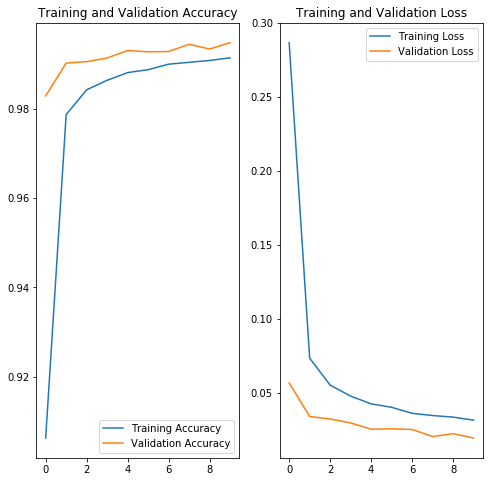

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()